In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
census_df = pd.read_csv('Censo_Output/censo_agropecuario.csv')
census_df.rename(columns={'P_MUNIC': 'Municipality code'}, inplace=True)
census_df

,Municipality code,inundacion,exceso_lluvia,sequia,total_riesgos,Credito_Solicitado,Credito_Aprobado,P_S6P71,total_agro,Credito_banco,...,agua_lluvia,agua_fuente_natural,agua_no_acceso,agua_acueducto,agua_carrotanque,distrito_riego,no_agua_contaminacion,no_agua_desastres_naturales,no_agua_sequia,no_agua_fallos_servicio
0,19001,0,7,17,14633,775.0,684.0,5958.0,5420,702.0,...,615.0,2553.0,405.0,1635.0,34.0,10.0,200.0,517.0,1861.0,517.0
1,19022,0,12,87,11335,204.0,159.0,1322.0,10257,156.0,...,4069.0,3951.0,2380.0,71.0,4.0,77.0,154.0,265.0,4688.0,265.0
2,19050,0,0,0,8134,416.0,303.0,3942.0,3736,307.0,...,342.0,2577.0,386.0,469.0,14.0,19.0,293.0,146.0,813.0,146.0
3,19075,0,0,0,9995,559.0,497.0,840.0,4419,497.0,...,810.0,3102.0,458.0,24.0,1.0,25.0,174.0,231.0,3142.0,231.0
4,19100,0,4,10,20519,537.0,466.0,1370.0,23205,484.0,...,1814.0,10235.0,9922.0,1011.0,33.0,89.0,179.0,659.0,11818.0,659.0
5,19110,0,0,8,16887,585.0,454.0,10183.0,6474,441.0,...,1976.0,3200.0,825.0,542.0,6.0,9.0,325.0,177.0,3104.0,177.0
6,19130,0,0,0,11519,791.0,706.0,2825.0,4961,727.0,...,233.0,3686.0,653.0,497.0,6.0,4.0,278.0,220.0,1937.0,220.0
7,19137,0,1,4,12295,898.0,829.0,3481.0,6261,860.0,...,855.0,4245.0,916.0,130.0,8.0,18.0,119.0,304.0,2446.0,304.0
8,19142,16,13,58,10201,575.0,515.0,3649.0,4116,483.0,...,1282.0,1971.0,723.0,463.0,6.0,31.0,234.0,343.0,1976.0,343.0
9,19212,0,0,0,4172,111.0,97.0,1347.0,2514,35.0,...,422.0,1186.0,817.0,55.0,1.0,0.0,64.0,59.0,914.0,59.0


In [11]:
for column in census_df.columns:
    print(column)

Municipality code
inundacion
exceso_lluvia
sequia
total_riesgos
Credito_Solicitado
Credito_Aprobado
P_S6P71
total_agro
Credito_banco
Credito_ong
Credito_gobierno
Credito_onu
inversion_tecnologia
inversion_otros
area_cultivo
area_bosques
area_nocultivada
area_infraestructura
infraestructura_en_construccion
agua_lluvia
agua_fuente_natural
agua_no_acceso
agua_acueducto
agua_carrotanque
distrito_riego
no_agua_contaminacion
no_agua_desastres_naturales
no_agua_sequia
no_agua_fallos_servicio


# Municipalities

In [12]:
municipalities = pd.read_csv('Datos/DIVIPOLA_Municipios.csv', encoding='latin1', sep=';')[['COD_MPIO', 'NOM_MPIO']]
municipalities.rename(columns={'COD_MPIO': 'Municipality code', 'NOM_MPIO': 'Municipality'}, inplace=True)
municipalities

,Municipality code,Municipality
0,5001,MEDELLÍN
1,5002,ABEJORRAL
2,5004,ABRIAQUÍ
3,5021,ALEJANDRÍA
4,5030,AMAGÁ
...,...,...
1116,97889,YAVARATÉ
1117,99001,PUERTO CARREÑO
1118,99524,LA PRIMAVERA
1119,99624,SANTA ROSALÍA


# Creditos

In [48]:
columns = ['Municipality code', 'total_agro', 'Credito_Solicitado', 'Credito_Aprobado', 'Credito_banco', 'Credito_ong', 'Credito_gobierno', 'Credito_onu']
credit_df = census_df[columns]
credit_df = municipalities.merge(credit_df, on=['Municipality code'], how='inner')
credit_df.drop(columns=['Municipality code'], inplace=True)
credit_df = credit_df.groupby(['Municipality']).sum().T
credit_df['CAUCA'] = credit_df.sum(1)
credit_df = credit_df.T
credit_df

,total_agro,Credito_Solicitado,Credito_Aprobado,Credito_banco,Credito_ong,Credito_gobierno,Credito_onu
Municipality,,,,,,,
ALMAGUER,10257.0,204.0,159.0,156.0,1.0,1.0,0.0
ARGELIA,3736.0,416.0,303.0,307.0,0.0,1.0,1.0
BALBOA,4419.0,559.0,497.0,497.0,2.0,2.0,0.0
BOLÍVAR,23205.0,537.0,466.0,484.0,2.0,1.0,1.0
BUENOS AIRES,6474.0,585.0,454.0,441.0,6.0,13.0,0.0
CAJIBÍO,4961.0,791.0,706.0,727.0,3.0,1.0,0.0
CALDONO,6261.0,898.0,829.0,860.0,4.0,2.0,1.0
CALOTO,4116.0,575.0,515.0,483.0,7.0,33.0,2.0
CORINTO,2514.0,111.0,97.0,35.0,1.0,62.0,0.0


In [72]:
credit_df['Creditos solicitados (%)'] = credit_df['Credito_Solicitado'] / credit_df['total_agro'] * 100
credit_df['creditos aprobados (%)'] = credit_df['Credito_Aprobado'] / credit_df['Credito_Solicitado'] * 100
credit_df['Creditos solicitados a bancos (%)'] = credit_df['Credito_banco'] / credit_df['Credito_Solicitado'] * 100
credit_df['Creditos solicitados a ONG (%)'] = credit_df['Credito_ong'] / credit_df['Credito_Solicitado'] * 100
credit_df['Creditos solicitados a gobierno (%)'] = credit_df['Credito_gobierno'] / credit_df['Credito_Solicitado'] * 100
credit_df['Creditos solicitados a onu (%)'] = credit_df['Credito_onu'] / credit_df['Credito_Solicitado'] * 100

credit_df.sort_values(by=['Creditos solicitados (%)'], ascending=False)[['Creditos solicitados (%)', 'creditos aprobados (%)', 'Creditos solicitados a bancos (%)', 'Creditos solicitados a ONG (%)', 'Creditos solicitados a gobierno (%)', 'Creditos solicitados a onu (%)']].to_excel('Estadisticas_creditos_Cauca.xlsx')

# Creditos solicitados

In [73]:
top_8 = credit_df.sort_values(by=['Creditos solicitados (%)'], ascending=False)[['Creditos solicitados (%)', 'creditos aprobados (%)', 'Creditos aprobados por bancos (%)', 'Creditos aprobados por ONG (%)', 'Creditos aprobados por gobierno (%)', 'Creditos aprobados por onu (%)']].head(8)
top_8

,Creditos solicitados (%),creditos aprobados (%),Creditos aprobados por bancos (%),Creditos aprobados por ONG (%),Creditos aprobados por gobierno (%),Creditos aprobados por onu (%)
Municipality,,,,,,
PADILLA,31.009772,96.848739,18.438178,0.216920,81.344902,0.000000
PUERTO TEJADA,27.617801,96.682464,28.431373,1.960784,70.588235,0.000000
MIRANDA,25.274725,85.652174,49.746193,0.761421,49.238579,0.253807
TIMBÍO,23.559583,90.348331,103.212851,0.963855,0.000000,0.080321
PURACÉ,20.746388,87.620890,99.779249,0.662252,0.000000,0.000000
SANTANDER DE QUILICHAO,20.398104,90.706320,94.672131,0.614754,6.967213,0.000000
TOTORÓ,17.778848,88.482385,99.693721,1.837672,0.153139,0.000000
LA SIERRA,17.678917,82.713348,101.322751,0.793651,0.529101,0.000000


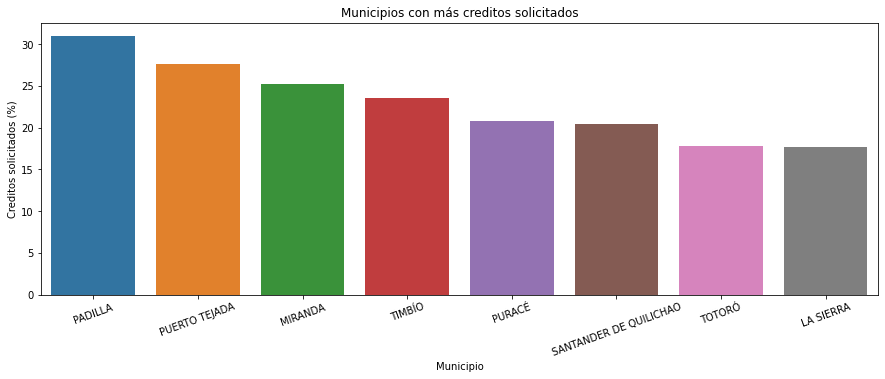

In [67]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=top_8.index , y="Creditos solicitados (%)", data=top_8)

plt.xticks(rotation=20)
ax.set(xlabel='Municipio')
plt.title('Municipios con más creditos solicitados')
plt.savefig("Mas-Creditos-solicitados-Cauca.png")
plt.show()


In [69]:
top_8 = credit_df.sort_values(by=['Creditos solicitados (%)'], ascending=True)[['Creditos solicitados (%)', 'creditos aprobados (%)', 'Creditos aprobados por bancos (%)', 'Creditos aprobados por ONG (%)', 'Creditos aprobados por gobierno (%)', 'Creditos aprobados por onu (%)']].head(8)
top_8

,Creditos solicitados (%),creditos aprobados (%),Creditos aprobados por bancos (%),Creditos aprobados por ONG (%),Creditos aprobados por gobierno (%),Creditos aprobados por onu (%)
Municipality,,,,,,
ALMAGUER,1.988886,77.941176,98.113208,0.628931,0.628931,0.000000
BOLÍVAR,2.314156,86.778399,103.862661,0.429185,0.214592,0.214592
LÓPEZ DE MICAY,2.496500,66.355140,98.591549,1.408451,0.000000,0.000000
SAN SEBASTIÁN,3.131851,74.000000,94.594595,0.675676,0.000000,0.000000
CORINTO,4.415274,87.387387,36.082474,1.030928,63.917526,0.000000
VILLA RICA,5.211726,91.250000,27.397260,1.369863,72.602740,0.000000
SANTA ROSA,5.416863,56.521739,106.153846,0.000000,1.538462,0.000000
LA VEGA,5.594274,86.531987,96.498054,0.778210,0.389105,0.389105


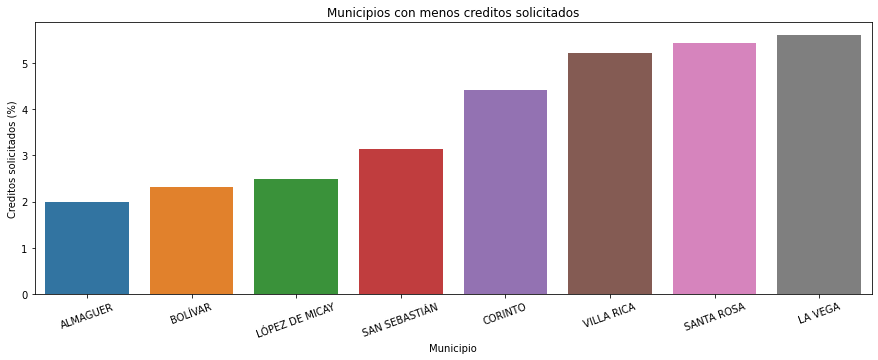

In [70]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=top_8.index , y="Creditos solicitados (%)", data=top_8)

plt.xticks(rotation=20)
ax.set(xlabel='Municipio')
plt.title('Municipios con menos creditos solicitados')
plt.savefig("Menos-Creditos-solicitados-Cauca.png")
plt.show()



# Creditos aprobados

In [75]:
top_8 = credit_df.sort_values(by=['creditos aprobados (%)'], ascending=False)[['Creditos solicitados (%)', 'creditos aprobados (%)', 'Creditos aprobados por bancos (%)', 'Creditos aprobados por ONG (%)', 'Creditos aprobados por gobierno (%)', 'Creditos aprobados por onu (%)']].head(8)
top_8

,Creditos solicitados (%),creditos aprobados (%),Creditos aprobados por bancos (%),Creditos aprobados por ONG (%),Creditos aprobados por gobierno (%),Creditos aprobados por onu (%)
Municipality,,,,,,
PADILLA,31.009772,96.848739,18.438178,0.216920,81.344902,0.000000
PUERTO TEJADA,27.617801,96.682464,28.431373,1.960784,70.588235,0.000000
ROSAS,16.228838,94.244604,102.290076,0.381679,0.190840,0.000000
CALDONO,14.342757,92.316258,103.739445,0.482509,0.241255,0.120627
MERCADERES,7.462106,91.666667,102.272727,0.852273,0.284091,0.000000
FLORENCIA,11.786600,91.578947,100.574713,2.873563,0.000000,0.000000
VILLA RICA,5.211726,91.250000,27.397260,1.369863,72.602740,0.000000
PIENDAMÓ - TUNÍA,15.352324,91.015625,105.257511,0.321888,0.214592,0.214592


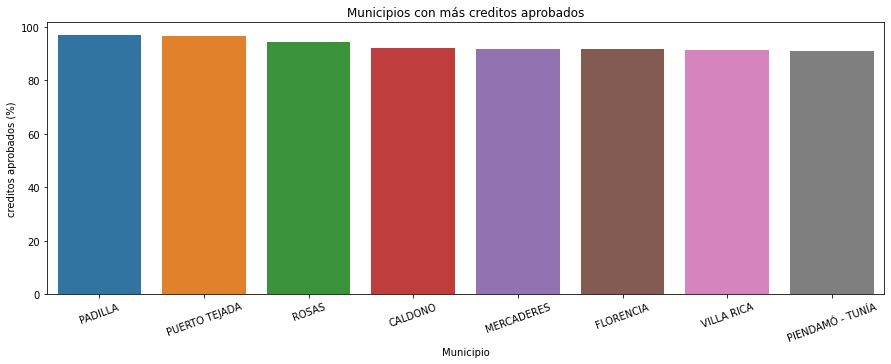

In [76]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=top_8.index , y="creditos aprobados (%)", data=top_8)

plt.xticks(rotation=20)
ax.set(xlabel='Municipio')
plt.title('Municipios con más creditos aprobados')
plt.savefig("Mas-Creditos-aprobados-Cauca.png")
plt.show()


In [77]:
top_8 = credit_df.sort_values(by=['creditos aprobados (%)'], ascending=True)[['Creditos solicitados (%)', 'creditos aprobados (%)', 'Creditos aprobados por bancos (%)', 'Creditos aprobados por ONG (%)', 'Creditos aprobados por gobierno (%)', 'Creditos aprobados por onu (%)']].head(8)
top_8

,Creditos solicitados (%),creditos aprobados (%),Creditos aprobados por bancos (%),Creditos aprobados por ONG (%),Creditos aprobados por gobierno (%),Creditos aprobados por onu (%)
Municipality,,,,,,
SANTA ROSA,5.416863,56.521739,106.153846,0.000000,1.538462,0.000000
TIMBIQUÍ,6.020067,65.079365,97.560976,1.219512,0.000000,0.000000
LÓPEZ DE MICAY,2.496500,66.355140,98.591549,1.408451,0.000000,0.000000
ARGELIA,11.134904,72.836538,101.320132,0.000000,0.330033,0.330033
SAN SEBASTIÁN,3.131851,74.000000,94.594595,0.675676,0.000000,0.000000
BUENOS AIRES,9.036145,77.606838,97.136564,1.321586,2.863436,0.000000
ALMAGUER,1.988886,77.941176,98.113208,0.628931,0.628931,0.000000
MORALES,15.494711,78.313253,99.102564,2.179487,0.128205,0.000000


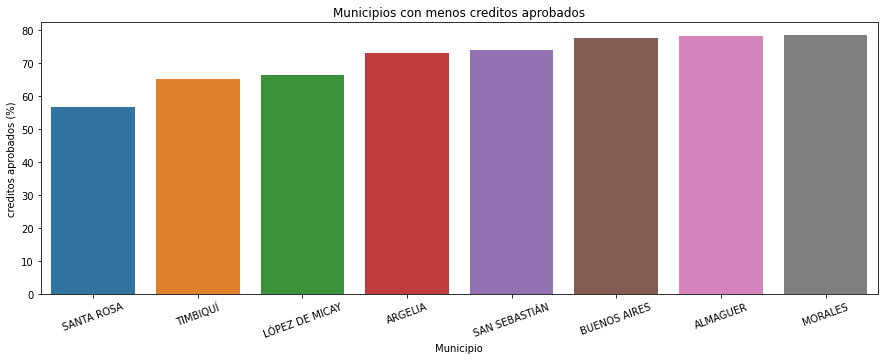

In [124]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=top_8.index , y="creditos aprobados (%)", data=top_8)

plt.xticks(rotation=20)
ax.set(xlabel='Municipio')
plt.title('Municipios con menos creditos aprobados')
plt.savefig("Menos-Creditos-aprobados-Cauca.png")
plt.show()

# Inversión

In [93]:
columns = ['Municipality code', 'inversion_tecnologia', 'inversion_otros']
investment_df = census_df[columns]
investment_df = municipalities.merge(investment_df, on=['Municipality code'], how='inner')
investment_df.drop(columns=['Municipality code'], inplace=True)
investment_df = investment_df.groupby(['Municipality']).sum().T
investment_df['CAUCA'] = investment_df.sum(1)
investment_df = investment_df.T
investment_df

,inversion_tecnologia,inversion_otros
Municipality,,
ALMAGUER,7.0,190.0
ARGELIA,10.0,359.0
BALBOA,15.0,604.0
BOLÍVAR,24.0,522.0
BUENOS AIRES,21.0,507.0
CAJIBÍO,58.0,762.0
CALDONO,50.0,1091.0
CALOTO,60.0,766.0
CORINTO,61.0,211.0


In [94]:
investment_df['total'] = investment_df.sum(1)

investment_df['Inversion tecnología (%)'] = investment_df['inversion_tecnologia'] / investment_df['total'] * 100
investment_df['Inversion otros (%)'] = investment_df['inversion_otros'] / investment_df['total'] * 100

investment_df.sort_values(by=['Inversion tecnología (%)'], ascending=False)[['Inversion tecnología (%)', 'Inversion otros (%)']].to_excel('Estadisticas_inversión_Cauca.xlsx')

In [101]:
investment_df.describe()[['Inversion tecnología (%)', 'Inversion otros (%)']].T.to_excel('Estadisticas_inversión_Cauca2.xlsx')

# Area Cultivo

In [104]:
columns = ['Municipality code', 'area_cultivo', 'area_bosques', 'area_nocultivada', 'area_infraestructura']
area_df = census_df[columns]
area_df = municipalities.merge(area_df, on=['Municipality code'], how='inner')
area_df.drop(columns=['Municipality code'], inplace=True)
area_df = area_df.groupby(['Municipality']).sum().T
area_df['CAUCA'] = area_df.sum(1)
area_df = area_df.T
area_df['total_area'] = area_df.sum(1)
area_df

,area_cultivo,area_bosques,area_nocultivada,area_infraestructura,total_area
Municipality,,,,,
ALMAGUER,6.597767e+07,1.224242e+08,3.612141e+07,1.718196e+06,2.262415e+08
ARGELIA,1.666753e+08,4.361814e+08,1.461655e+08,2.824463e+05,7.493046e+08
BALBOA,2.020646e+08,8.911051e+07,8.355906e+07,2.579005e+05,3.749921e+08
BOLÍVAR,3.477430e+08,6.208905e+07,3.044049e+08,1.312281e+05,7.143683e+08
BUENOS AIRES,1.735961e+08,6.782040e+07,9.476140e+07,4.225333e+06,3.404032e+08
CAJIBÍO,2.243801e+08,7.940228e+07,1.388007e+08,4.760092e+06,4.473432e+08
CALDONO,1.490620e+08,9.684139e+07,5.959745e+07,6.010299e+05,3.061018e+08
CALOTO,1.622975e+08,8.155217e+07,1.159825e+07,7.057178e+06,2.625051e+08
CORINTO,1.374475e+08,8.431874e+07,1.427720e+07,5.072801e+06,2.411162e+08


In [105]:
area_df['area cultivada (%)'] = area_df['area_cultivo'] / area_df['total_area'] * 100
area_df['area bosques (%)'] = area_df['area_bosques'] / area_df['total_area'] * 100
area_df['area no cultivada (%)'] = area_df['area_nocultivada'] / area_df['total_area'] * 100
area_df['area infraestructura (%)'] = area_df['area_infraestructura'] / area_df['total_area'] * 100

area_df.sort_values(by=['area cultivada (%)'], ascending=False)[['area cultivada (%)', 'area no cultivada (%)', 'area bosques (%)', 'area infraestructura (%)']].to_excel('Estadisticas_areas_Cauca.xlsx')

In [106]:
area_df

,area_cultivo,area_bosques,area_nocultivada,area_infraestructura,total_area,area cultivada (%),area bosques (%),area no cultivada (%),area infraestructura (%)
Municipality,,,,,,,,,
ALMAGUER,6.597767e+07,1.224242e+08,3.612141e+07,1.718196e+06,2.262415e+08,29.162501,54.112181,15.965866,0.759452
ARGELIA,1.666753e+08,4.361814e+08,1.461655e+08,2.824463e+05,7.493046e+08,22.243998,58.211493,19.506814,0.037694
BALBOA,2.020646e+08,8.911051e+07,8.355906e+07,2.579005e+05,3.749921e+08,53.885037,23.763302,22.282886,0.068775
BOLÍVAR,3.477430e+08,6.208905e+07,3.044049e+08,1.312281e+05,7.143683e+08,48.678401,8.691462,42.611767,0.018370
BUENOS AIRES,1.735961e+08,6.782040e+07,9.476140e+07,4.225333e+06,3.404032e+08,50.997189,19.923550,27.837988,1.241273
CAJIBÍO,2.243801e+08,7.940228e+07,1.388007e+08,4.760092e+06,4.473432e+08,50.158380,17.749746,31.027794,1.064081
CALDONO,1.490620e+08,9.684139e+07,5.959745e+07,6.010299e+05,3.061018e+08,48.696855,31.636984,19.469811,0.196350
CALOTO,1.622975e+08,8.155217e+07,1.159825e+07,7.057178e+06,2.625051e+08,61.826418,31.066890,4.418295,2.688396
CORINTO,1.374475e+08,8.431874e+07,1.427720e+07,5.072801e+06,2.411162e+08,57.004663,34.970161,5.921293,2.103882


In [108]:
area_df.describe()[['area cultivada (%)', 'area no cultivada (%)', 'area bosques (%)', 'area infraestructura (%)']].T.to_excel('Estadisticas_area_Cauca2.xlsx')

In [121]:
area_statistics = area_df.describe()[['area cultivada (%)', 'area no cultivada (%)', 'area bosques (%)', 'area infraestructura (%)']].T
area_statistics.index.to_list()

['area cultivada (%)',
 'area no cultivada (%)',
 'area bosques (%)',
 'area infraestructura (%)']

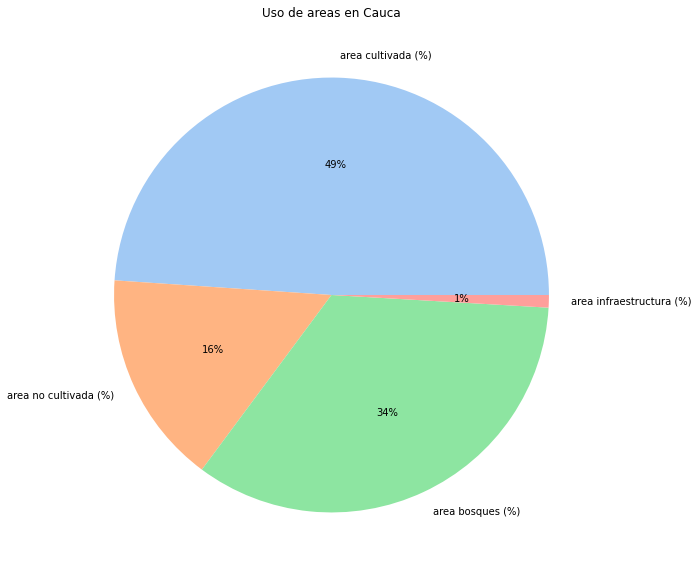

In [126]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:5]
ax = plt.pie(area_statistics['mean'], labels = area_statistics.index.to_list(), colors = colors, autopct='%.0f%%')

plt.xticks(rotation=20)

plt.title('Uso de areas en Cauca')
plt.savefig("Uso-areas-cauca.png")
plt.show()